#### imports

In [1]:
import os
from sklearn.cluster import k_means, KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator, ClassifierMixin, ClusterMixin
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np
import cv2


In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import json
import os
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import Normalizer, MinMaxScaler
from sklearn.pipeline import Pipeline

from cmeans import save_model

from sklearn.metrics.cluster import adjusted_rand_score #, ran
from sklearn import datasets
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [3]:
def uqi(img1, img2):
    """
    Calculate the Universal Quality Image Index (UQI) between two images.

    Parameters:
    img1 (numpy array): First image (reference image).
    img2 (numpy array): Second image (image to be compared).

    Returns:
    float: UQI value between -1 and 1.
    """
    assert img1.shape == img2.shape, "Images must have the same dimensions"
    
    N = img1.size
    
    # Means
    mean1 = np.mean(img1)
    mean2 = np.mean(img2)
    
    # Variances and covariance
    var1 = np.var(img1)
    var2 = np.var(img2)
    covar = np.mean((img1 - mean1) * (img2 - mean2))
    
    # UQI calculation
    numerator = 4 * covar * mean1 * mean2
    denominator = (var1 + var2) * (mean1**2 + mean2**2)
    
    if denominator == 0:
        return 1 if numerator == 0 else 0
    
    uqi_value = numerator / denominator
    return uqi_value


In [4]:
def calculate_histogram(image, bins=256):
    """
    Calculate the histogram of an image.
    
    Parameters:
    image (numpy array): Input image.
    bins (int): Number of bins for the histogram.
    
    Returns:
    numpy array: Histogram of the image.
    """
    hist = [cv2.calcHist(images=[image], channels=[channel], mask=None, histSize = [bins], ranges=[0, 256]) \
            for channel in range(3)]
    # hist = cv2.normalize(hist, hist).flatten()
    return hist

def ssim_histogram(hist1, hist2, C1=1e-4, C2=9e-4):
    """
    Calculate SSIM between two histograms.
    
    Parameters:
    hist1 (numpy array): Histogram of the first image.
    hist2 (numpy array): Histogram of the second image.
    C1 (float): Constant to avoid division by zero.
    C2 (float): Constant to avoid division by zero.
    
    Returns:
    float: SSIM value.
    """
    def hist_ssim(hist1, hist2):
        mu_x = np.mean(hist1)
        mu_y = np.mean(hist2)
        sigma_x = np.var(hist1)
        sigma_y = np.var(hist2)
        sigma_xy = np.mean((hist1 - mu_x) * (hist2 - mu_y))
        
        return ((2 * mu_x * mu_y + C1) * (2 * sigma_xy + C2)) / ((mu_x ** 2 + mu_y ** 2 + C1) * (sigma_x + sigma_y + C2))
    
 
    ssim_value = [hist_ssim(hist1[channel], hist2[channel]) for channel in range(3)]
    
    return np.mean(ssim_value)

In [5]:
def metricas(image1, image2):
    uqi_value = uqi(image1, image2)

    hist1 = calculate_histogram(image1)
    hist2 = calculate_histogram(image2)

    # Calcular SSIM entre histogramas
    ssim = ssim_histogram(image1, image2)
    hssim = ssim_histogram(hist1, hist2)
    print(f"SSIM : {ssim:.4f}")
    print(f"SSIM entre histogramas: {hssim:.4f}")
    print(f"UQI: {uqi_value:.4f}")
    return ssim, hssim, uqi_value

### colect data

In [6]:
tol = 0.0001

#### eBDtheque_database_v3 Page CYB_COSMOZONE

In [7]:
resultados = []

In [8]:
# from Pill import Image 
from PIL import Image, ImageDraw, ImageFont
import numpy as np

img_path = "./datasets/eBDtheque_database_v3/Pages/CYB_COSMOZONE_012.jpg"

image = np.array(Image.open(img_path).convert("RGB"))
# image_shape_out = 320, 320, 3
image_shape_out = image.shape

print(image.shape)
X = image[:image_shape_out[0],\
                     :image_shape_out[1], \
                        :image_shape_out[2]].reshape(-1, image_shape_out[2]) /255
print(X.shape)

(661, 569, 3)
(376109, 3)


In [9]:
# image 출력 함수 정의
def show_img_bbox(X, y):
    plt.figure(figsize=(20, 20))
    for i, img in enumerate([X, y]):
        plt.subplot(1, 2, i+1)
        plt.imshow(img)


#### c = 20

##### fit

In [10]:
model = KMeans(n_clusters=20, n_init=50, tol=tol, verbose=True)
model.fit(X, None)

Initialization complete
Iteration 0, inertia 2549.1468819671836.
Iteration 1, inertia 2035.4117597879483.
Iteration 2, inertia 1975.6557226296609.
Iteration 3, inertia 1940.3540512623808.
Iteration 4, inertia 1916.086029856183.
Iteration 5, inertia 1893.040536435233.
Iteration 6, inertia 1872.3812236028261.
Iteration 7, inertia 1856.6914122666108.
Iteration 8, inertia 1844.0130780166269.
Iteration 9, inertia 1831.8228948607975.
Iteration 10, inertia 1819.4363826342483.
Iteration 11, inertia 1808.111026402562.
Iteration 12, inertia 1798.3983880240148.
Iteration 13, inertia 1790.5427204873913.
Iteration 14, inertia 1783.348547624063.
Iteration 15, inertia 1776.9425549099137.
Iteration 16, inertia 1771.3246836925769.
Iteration 17, inertia 1765.5310961722298.
Iteration 18, inertia 1760.8669580762735.
Iteration 19, inertia 1758.4461183543294.
Iteration 20, inertia 1757.0970294851804.
Iteration 21, inertia 1756.2971932726223.
Iteration 22, inertia 1755.7185682030595.
Iteration 23, inertia 17

KMeans(n_clusters=20, n_init=50, verbose=True)

In [11]:
y = model.predict(X)

In [12]:
model.cluster_centers_

array([[0.15234697, 0.13874497, 0.17804573],
       [0.99674885, 0.99499099, 0.99588439],
       [0.68914777, 0.68168879, 0.67857081],
       [0.64738643, 0.54809433, 0.4043541 ],
       [0.98220249, 0.91403898, 0.6828662 ],
       [0.04035399, 0.01587807, 0.01880839],
       [0.89901869, 0.10361067, 0.1399668 ],
       [0.89388991, 0.3871368 , 0.34516772],
       [0.82812729, 0.70641875, 0.55243121],
       [0.7443805 , 0.66073832, 0.92731683],
       [0.55745398, 0.15667515, 0.17642949],
       [0.43933826, 0.41005308, 0.39541077],
       [0.87916525, 0.81916217, 0.95165151],
       [0.31133287, 0.26587377, 0.23222794],
       [0.95868245, 0.91305895, 0.35936126],
       [0.67016779, 0.37465456, 0.41223714],
       [0.84252904, 0.80864118, 0.77966274],
       [0.91108377, 0.45855819, 0.55748132],
       [0.23279161, 0.03589238, 0.02442217],
       [0.59915067, 0.57172836, 0.59146329]])

In [13]:
y_image = (model.cluster_centers_[y].reshape(image_shape_out)*255).astype(np.uint8)

In [15]:
from cmeans import save_model


In [17]:
filename = img_path.split("/")[-1]
set_name = "results/minimal/k_means/comics/"
save_model(model, f"{set_name}model/20/model.json")

Image.fromarray(y_image).save(f"{set_name}imgs/20/{filename}")
ssim, hssim, q = metricas(image, y_image)
resultados.append([ssim, hssim, q])

SSIM : 0.0040
SSIM entre histogramas: 0.1036
UQI: 0.9928


In [18]:
# y_image

##### show

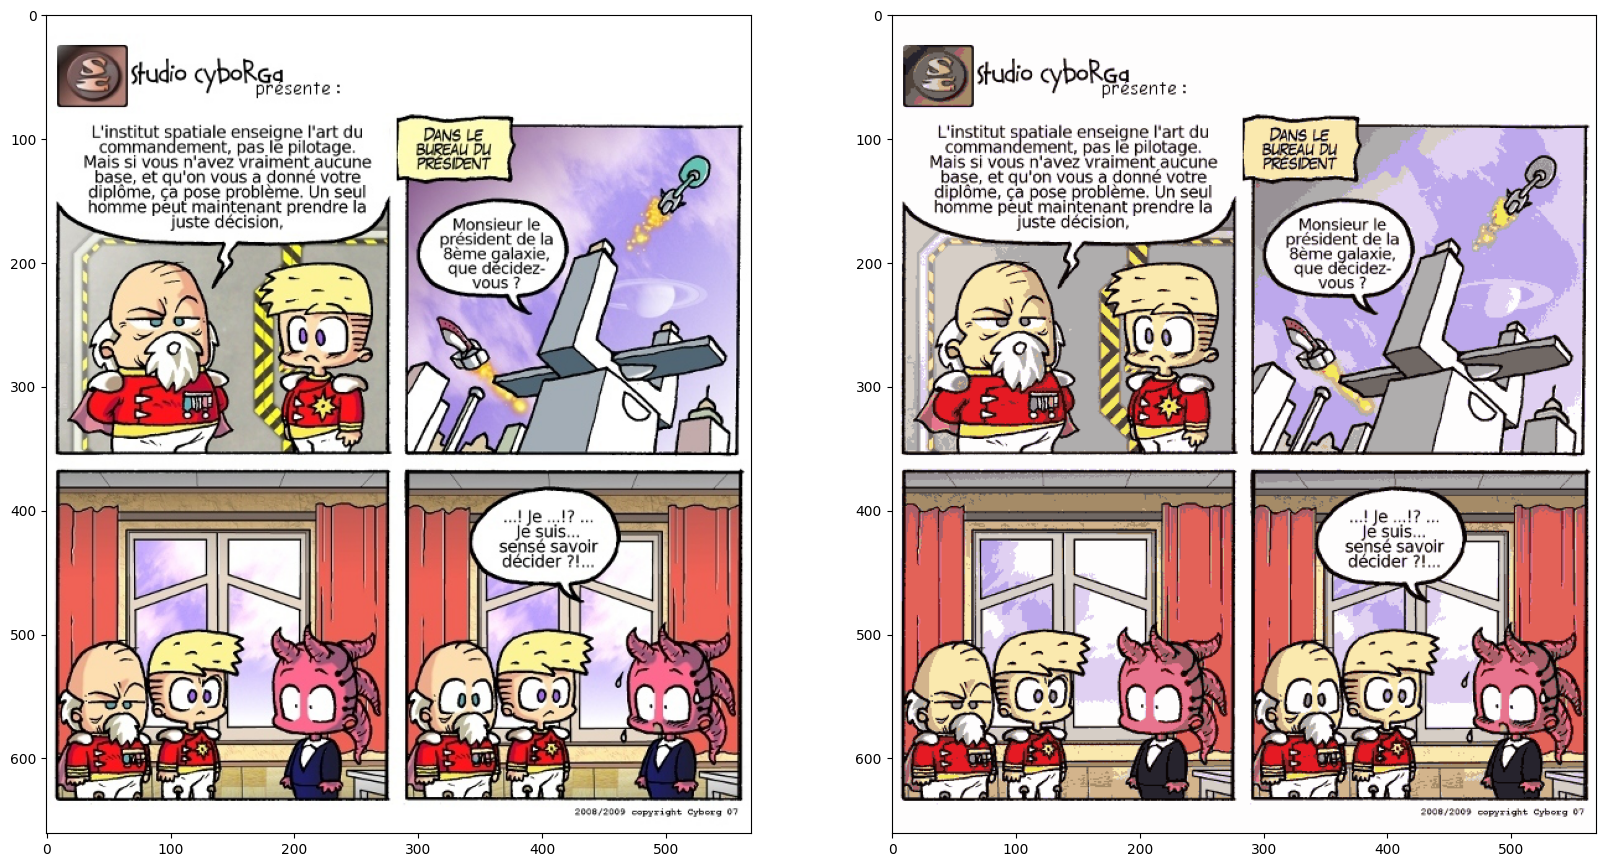

In [19]:
show_img_bbox(image[:image_shape_out[0],\
                     :image_shape_out[1], \
                        :image_shape_out[2]], y_image)

#### c = 10

##### fit

In [20]:
# model = FuzzyCMeansGaussianS2(num_class=10, epochs=50, threshold=.5, verbose=True)
model = KMeans(n_clusters=10, n_init=50, tol=tol, verbose=True)
model.fit(X, None)

Initialization complete
Iteration 0, inertia 5737.723629370573.
Iteration 1, inertia 4061.971898641519.
Iteration 2, inertia 3905.1783628211215.
Iteration 3, inertia 3870.3693177245696.
Iteration 4, inertia 3857.45460694177.
Iteration 5, inertia 3847.2555320864367.
Iteration 6, inertia 3830.2552272060857.
Iteration 7, inertia 3807.750341952724.
Iteration 8, inertia 3789.9954023358.
Iteration 9, inertia 3780.5777175552444.
Iteration 10, inertia 3776.9691562830367.
Iteration 11, inertia 3775.7989338905263.
Converged at iteration 11: center shift 1.018803275100891e-05 within tolerance 1.0512666408379014e-05.
Initialization complete
Iteration 0, inertia 4761.3677816218915.
Iteration 1, inertia 4073.939973081593.
Iteration 2, inertia 4006.9921734133086.
Iteration 3, inertia 3923.008015074288.
Iteration 4, inertia 3883.5144388927547.
Iteration 5, inertia 3873.935886620471.
Iteration 6, inertia 3870.4323652564854.
Iteration 7, inertia 3866.068083792271.
Iteration 8, inertia 3854.2873543483333

KMeans(n_clusters=10, n_init=50, verbose=True)

In [21]:
model.cluster_centers_

array([[0.99630791, 0.99410592, 0.99564351],
       [0.28753958, 0.21382183, 0.21124944],
       [0.74743166, 0.66347347, 0.92456051],
       [0.8848747 , 0.39958662, 0.38015323],
       [0.07720664, 0.02621896, 0.02812775],
       [0.70491294, 0.66963111, 0.63874079],
       [0.97213169, 0.90108221, 0.65527236],
       [0.52905637, 0.44826559, 0.41459004],
       [0.8660222 , 0.81869345, 0.88701743],
       [0.8270162 , 0.11392843, 0.15026878]])

In [22]:
y = model.predict(X)

In [23]:
y_image = (model.cluster_centers_[y].reshape(image_shape_out)*255).astype(np.uint8)

In [24]:
filename = img_path.split("/")[-1]
set_name = "results/minimal/k_means/comics/"
save_model(model, f"{set_name}model/10/model.json")

Image.fromarray(y_image).save(f"{set_name}imgs/20/{filename}")
ssim, hssim, q = metricas(image, y_image)
resultados.append([ssim, hssim, q])

SSIM : 0.0040
SSIM entre histogramas: 0.0899
UQI: 0.9850


##### show

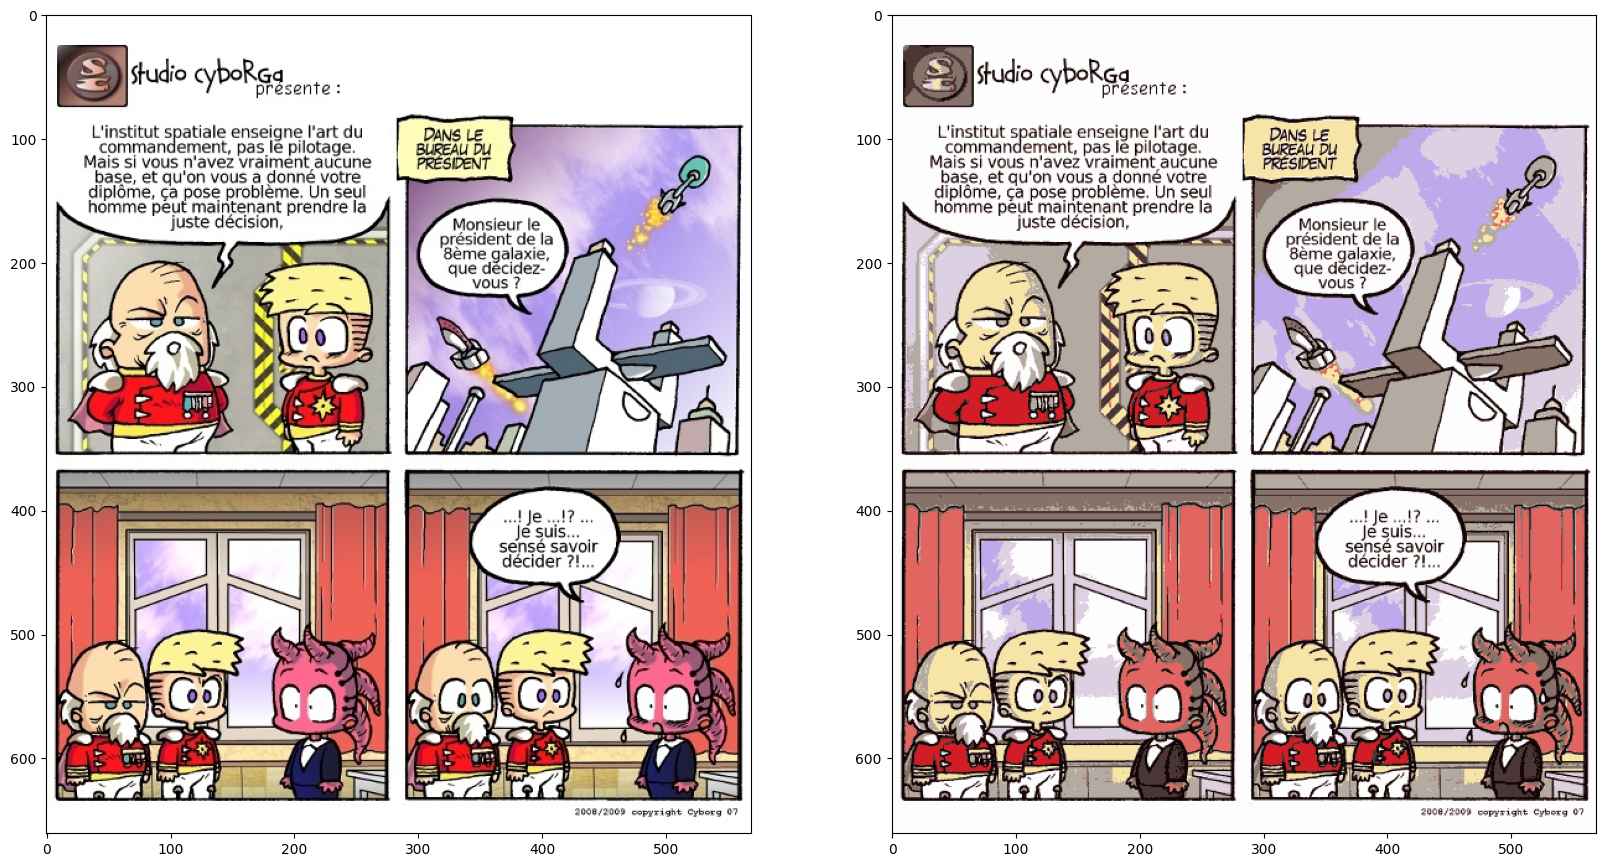

In [25]:
show_img_bbox(image[:image_shape_out[0],\
                     :image_shape_out[1], \
                        :image_shape_out[2]], y_image)

In [26]:
# time change
# new row
# new column
# pure grid
# ecs_insert
# whole_row
# whole_column


#### wikiart High_Renaissance leonardo da vinci mona lisa

In [27]:
# from Pill import Image 
from PIL import Image, ImageDraw, ImageFont
import numpy as np

img_path = "./datasets/wikiart/High_Renaissance/leonardo-da-vinci_mona-lisa.jpg"
image_shape_out = 640, 640, 3
img = Image.open(img_path).convert("RGB")
img = img.resize(image_shape_out[:2])
image = np.array(img)
# image_shape_out = image.shape

print(image.shape)
X = image[:image_shape_out[0],\
                     :image_shape_out[1], \
                        :image_shape_out[2]].reshape(-1, image_shape_out[2]) /255
print(X.shape)

(640, 640, 3)
(409600, 3)


In [28]:
# image 출력 함수 정의
def show_img_bbox(X, y):
    plt.figure(figsize=(20, 20))
    for i, img in enumerate([X, y]):
        plt.subplot(1, 2, i+1)
        plt.imshow(img)


#### c = 20

##### fit

In [29]:
# model = FuzzyCMeansGaussianS2(num_class=20, epochs=50, threshold=.5, verbose=True)
model = KMeans(n_clusters=20, n_init=50, tol=tol, verbose=True)

model.fit(X, None)

Initialization complete
Iteration 0, inertia 992.5920184544518.
Iteration 1, inertia 800.2322713003609.
Iteration 2, inertia 780.6333690793542.
Iteration 3, inertia 766.5628520934708.
Iteration 4, inertia 756.753033940798.
Iteration 5, inertia 750.5736703207493.
Iteration 6, inertia 746.6436307354945.
Iteration 7, inertia 744.0472542715625.
Iteration 8, inertia 742.1951262702169.
Iteration 9, inertia 740.8565198515876.
Iteration 10, inertia 739.7216379966223.
Iteration 11, inertia 738.741337551201.
Iteration 12, inertia 737.8966424932371.
Iteration 13, inertia 737.2115582229368.
Iteration 14, inertia 736.575185083007.
Iteration 15, inertia 735.9366932189891.
Iteration 16, inertia 735.2801009969631.
Iteration 17, inertia 734.6231592959022.
Iteration 18, inertia 733.9957937277385.
Iteration 19, inertia 733.3946236479622.
Iteration 20, inertia 732.8474501358521.
Iteration 21, inertia 732.3487621559124.
Iteration 22, inertia 731.8700576572642.
Iteration 23, inertia 731.4227045287427.
Itera

KMeans(n_clusters=20, n_init=50, verbose=True)

In [30]:
model.cluster_centers_

array([[0.37187138, 0.31089168, 0.12681531],
       [0.56866687, 0.47722376, 0.18112037],
       [0.06668783, 0.02651523, 0.03074193],
       [0.93575926, 0.66929204, 0.20120471],
       [0.2077652 , 0.15675932, 0.08242451],
       [0.6329095 , 0.35423975, 0.09062866],
       [0.75145229, 0.44790565, 0.10879234],
       [0.28764876, 0.13148338, 0.06873526],
       [0.72186434, 0.60275898, 0.23808231],
       [0.49746173, 0.4052479 , 0.136507  ],
       [0.51026362, 0.26659375, 0.08046004],
       [0.42899679, 0.43437187, 0.21753659],
       [0.27700516, 0.2311006 , 0.10625273],
       [0.16627535, 0.08640658, 0.06012374],
       [0.64630247, 0.53758017, 0.20612347],
       [0.79961731, 0.67599319, 0.29336663],
       [0.86470092, 0.55270094, 0.1426748 ],
       [0.39252352, 0.19636951, 0.07706177],
       [0.10359488, 0.05146894, 0.05058338],
       [0.96467041, 0.78069917, 0.27350426]])

In [31]:
y = model.predict(X)

In [32]:
y_image = (model.cluster_centers_[y].reshape(image_shape_out)*255).astype(np.uint8)

In [34]:
filename = img_path.split("/")[-1]
set_name = "results/minimal/k_means/art/"
save_model(model, f"{set_name}model/20/model.json")

os.makedirs(f"{set_name}imgs/20/")
Image.fromarray(y_image).save(f"{set_name}imgs/20/{filename}")
ssim, hssim, q = metricas(image, y_image)
resultados.append([ssim, hssim, q])

SSIM : 0.9256
SSIM entre histogramas: 0.2326
UQI: 0.9941


In [35]:
# y_image

##### show

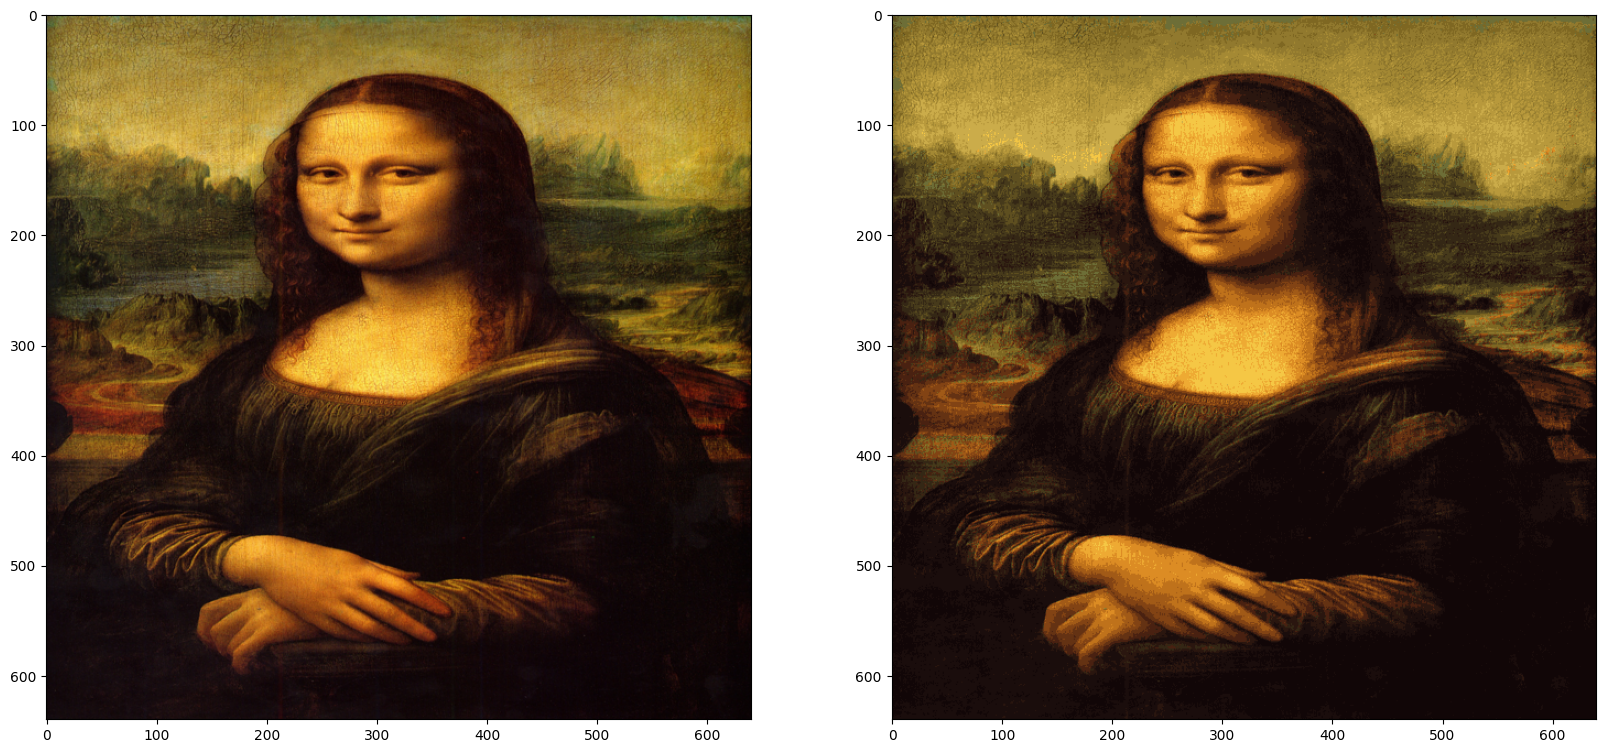

In [36]:
show_img_bbox(image[:image_shape_out[0],\
                     :image_shape_out[1], \
                        :image_shape_out[2]], y_image)

#### c = 10

##### fit

In [37]:
# model = FuzzyCMeansGaussianS2(num_class=10, epochs=50, threshold=.5, verbose=True)
model = KMeans(n_clusters=10, n_init=50, tol=tol, verbose=True)

model.fit(X, None)

Initialization complete
Iteration 0, inertia 2050.6832602843288.
Iteration 1, inertia 1650.7563423243319.
Iteration 2, inertia 1608.9552035864817.
Iteration 3, inertia 1577.5599486453846.
Iteration 4, inertia 1551.158833462804.
Iteration 5, inertia 1531.2776241896822.
Iteration 6, inertia 1512.0321024020243.
Iteration 7, inertia 1493.2711280653962.
Iteration 8, inertia 1478.0301689552352.
Iteration 9, inertia 1467.5178475656837.
Iteration 10, inertia 1460.0514036230918.
Iteration 11, inertia 1455.047526626107.
Iteration 12, inertia 1451.760293043606.
Iteration 13, inertia 1449.5419028428967.
Iteration 14, inertia 1447.99316066708.
Iteration 15, inertia 1446.8706075097928.
Iteration 16, inertia 1446.062677673318.
Iteration 17, inertia 1445.5072468005073.
Iteration 18, inertia 1445.1238305768288.
Iteration 19, inertia 1444.856482224386.
Iteration 20, inertia 1444.663895838007.
Converged at iteration 20: center shift 3.6508990184647357e-06 within tolerance 4.18832966809701e-06.
Initializa

KMeans(n_clusters=10, n_init=50, verbose=True)

In [38]:
model.cluster_centers_

array([[0.16628946, 0.09173942, 0.06210429],
       [0.62314505, 0.51748329, 0.19563531],
       [0.07982365, 0.03537303, 0.03817174],
       [0.93528433, 0.71300529, 0.2390419 ],
       [0.60361162, 0.33493031, 0.08785296],
       [0.7388389 , 0.61922351, 0.2519929 ],
       [0.39996952, 0.25412948, 0.09686884],
       [0.8108712 , 0.50030435, 0.12481337],
       [0.26914206, 0.1771351 , 0.08666984],
       [0.49124158, 0.42801217, 0.16966523]])

In [39]:
y = model.predict(X)

In [40]:
y_image = (model.cluster_centers_[y].reshape(image_shape_out)*255).astype(np.uint8)

In [44]:
filename = img_path.split("/")[-1]
set_name = "results/minimal/k_means/art/"
save_model(model, f"{set_name}model/10/model.json")

os.makedirs(f"{set_name}imgs/10/", exist_ok=True)
Image.fromarray(y_image).save(f"{set_name}imgs/10/{filename}")
ssim, hssim, q = metricas(image, y_image)
resultados.append([ssim, hssim, q])

SSIM : 0.8565
SSIM entre histogramas: 0.1339
UQI: 0.9881


##### show

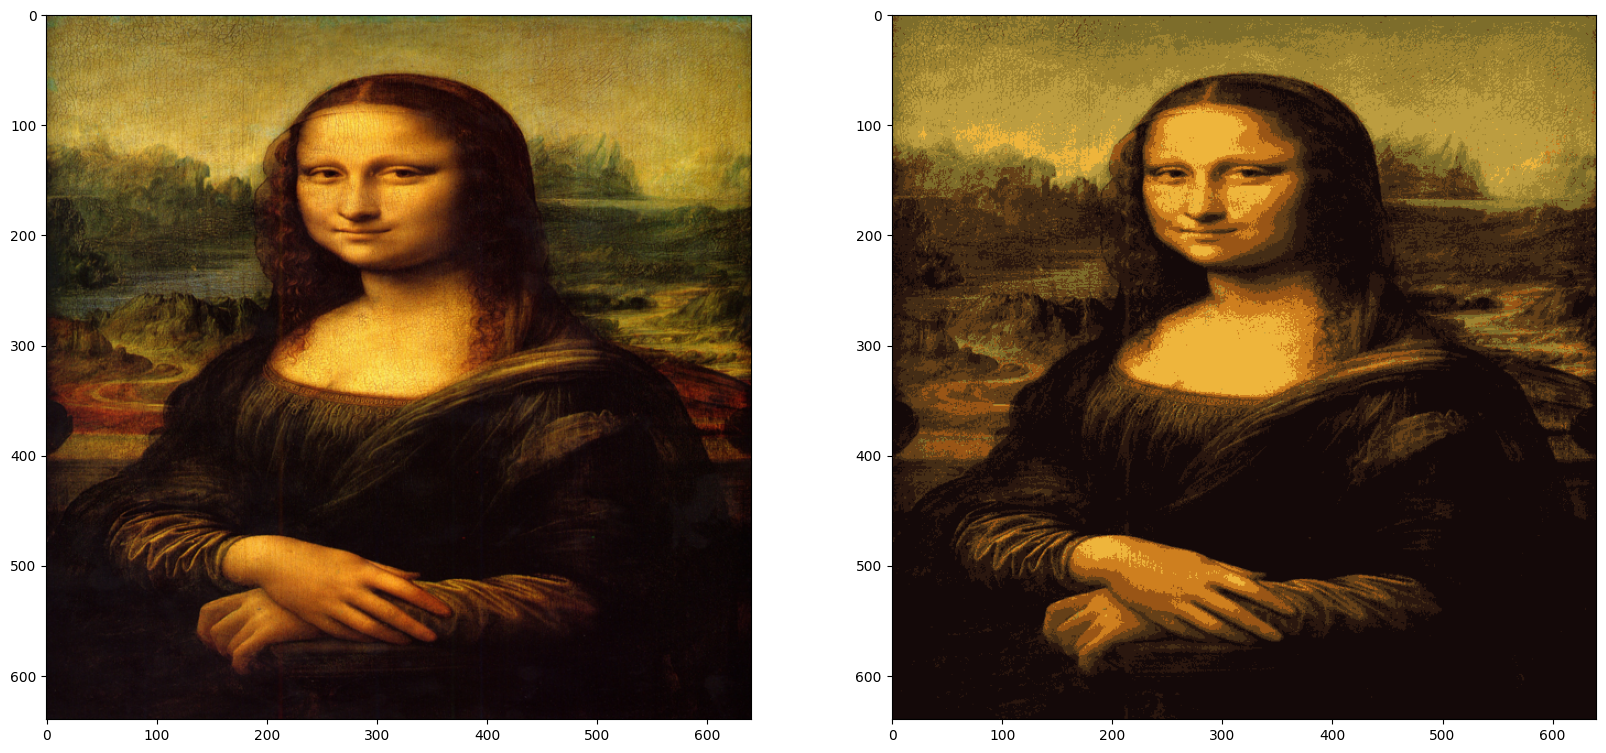

In [45]:
show_img_bbox(image[:image_shape_out[0],\
                     :image_shape_out[1], \
                        :image_shape_out[2]], y_image)

In [46]:
# time change
# new row
# new column
# pure grid
# ecs_insert
# whole_row
# whole_column


In [47]:
pd.DataFrame(
    np.array(resultados).T, index=["ssim", "hssim", "uqi"]
).T.to_csv(f"results/minimal/k_means/metricas.csv")
print(resultados)

[[0.004033576940957825, 0.1035958267668574, 0.9928157289973427], [0.004033576940957825, 0.08990421470940124, 0.9850306673939557], [0.9255826466803742, 0.23255655403316047, 0.9941106928976599], [0.8565349271725445, 0.13390261509582405, 0.9881226649928794]]
